In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

# linear dataset

In [223]:
np.random.seed(42)

In [224]:
X,y = make_blobs(n_samples=500,centers=4,n_features=10,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape)

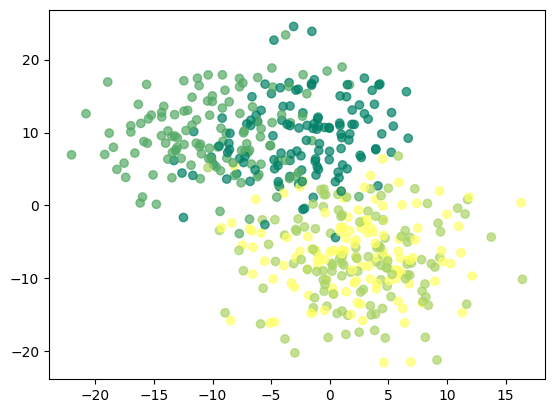

In [225]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

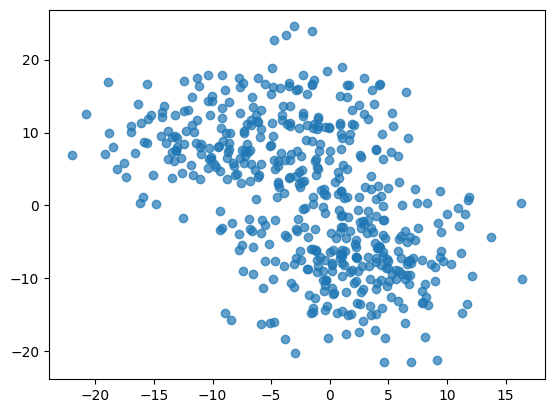

In [226]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [227]:
X.shape

(500, 10)

In [228]:
df_linear = pd.DataFrame(X) 

In [229]:
df_linear.columns = [f"vab_{col+1}" for col in df_linear.columns]

In [230]:
df_linear['target'] = y

In [231]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  
0     3.817842  3.587400 -4.383650  -1.607136       1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3  
2    -9.302836  4.211802 -4.587759  -5.983203       1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2  
4    -5.886460 -4.564809  3.010796  -9.167377       3  
..         ...       ...       ...        ...     ...  
495  -7.168167  5.228464  2.771318  -7.182853       2  
496 -11.446325  5.395608  1.606887  -0.122200       2  
497   1.309891  0.903259  2.360404 -21.488913       2  
498  -5.524547  0.760455 -0.050439   7.297902       1  
499  -0.810328  6.438151  7.111254  -5.241037       3  

[500 rows x 11 columns]

In [232]:
df_linear['target'].value_counts()

target
1    125
3    125
2    125
0    125
Name: count, dtype: int64

In [233]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

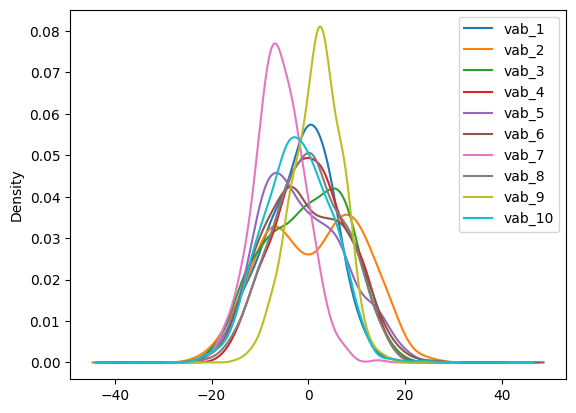

In [234]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [235]:
df_linear.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.486942 -0.447335  0.350051  0.410801  0.452514 -0.075782   
vab_2  -0.486942  1.000000  0.613055 -0.308053 -0.535676 -0.660596 -0.042907   
vab_3  -0.447335  0.613055  1.000000 -0.404254 -0.585948 -0.588399 -0.045079   
vab_4   0.350051 -0.308053 -0.404254  1.000000  0.417966  0.273300 -0.042056   
vab_5   0.410801 -0.535676 -0.585948  0.417966  1.000000  0.522756  0.058207   
vab_6   0.452514 -0.660596 -0.588399  0.273300  0.522756  1.000000  0.006910   
vab_7  -0.075782 -0.042907 -0.045079 -0.042056  0.058207  0.006910  1.000000   
vab_8  -0.211216  0.442483  0.449298 -0.252915 -0.516129 -0.388445 -0.142480   
vab_9   0.229445 -0.203147 -0.257066  0.293808  0.230401  0.217423 -0.039972   
vab_10 -0.140779  0.347897  0.224178  0.237288 -0.100335 -0.325186 -0.116193   

           vab_8     vab_9    vab_10  
vab_1  -0.211216  0.229445 -0.140779  
vab_2   0.442483 -0.203147  0.347897  
vab_3   0.449298 -0.257066  0.224178  
vab_4  -0.252915  0.293808  0.237288  
vab_5  -0.516129  0.230401 -0.100335  
vab_6  -0.388445  0.217423 -0.325186  
vab_7  -0.142480 -0.039972 -0.116193  
vab_8   1.000000 -0.095332  0.161269  
vab_9  -0.095332  1.000000  0.032065  
vab_10  0.161269  0.032065  1.000000

<Axes: >

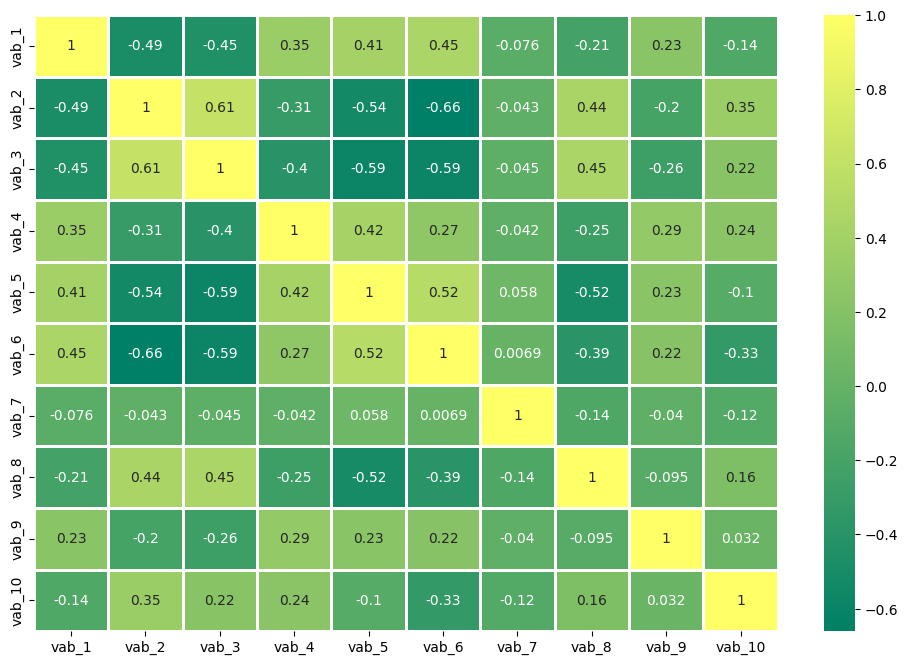

In [236]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

### data standardization

In [237]:
X_values = df_linear.iloc[:,:-1].values

In [238]:
y_values = df_linear.iloc[:,-1].values

In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
scaler = StandardScaler()

In [241]:
X_values = scaler.fit_transform(X_values)

In [242]:
np.mean(X_values),np.std(X_values)

(-1.0373923942097463e-16, 1.0)

In [243]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0   -0.576590  0.834881  1.268863  0.337453 -0.744489 -0.958663  1.865415   
1    0.129787 -0.976571 -0.857178 -0.361571  0.285170  0.370419 -0.423208   
2    0.056346  0.780833  0.767608 -1.674416 -0.989220 -0.552043 -0.656153   
3    0.201845  0.029735 -0.583080 -1.419291  0.579122 -0.194416  0.196365   
4    1.231941 -0.897840 -1.061697  1.034143  0.602032  0.288074  0.000416   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.842091 -0.275115  0.079701  0.498445  0.340091 -0.114117 -0.245907   
496  0.215592 -1.232573 -0.293184 -0.216777 -0.220106  0.738061 -1.068095   
497  1.566573 -0.985485 -1.074626 -1.811564 -0.887315  0.061809  1.383430   
498 -1.790237  1.175916  1.092213 -0.786994 -0.478104  0.297571  0.069969   
499 -0.927441 -0.367789 -1.089171  1.713849  0.990475  0.854217  0.975960   

            7         8         9  
0    0.469103 -1.225911  0.084795  
1   -0.887944 -0.445326 -1.022465  
2    0.553320 -1.266518 -0.552017  
3   -1.333457 -1.172165 -0.902074  
4   -0.630439  0.245180 -1.015383  
..        ...       ...       ...  
495  0.690444  0.197537 -0.726592  
496  0.712988 -0.034121  0.300886  
497  0.107075  0.115788 -2.808434  
498  0.087814 -0.363838  1.380671  
499  0.853602  1.060948 -0.444016  

[500 rows x 10 columns]

## pca application

In [244]:
from sklearn.decomposition import PCA

In [245]:
pca_general = PCA()

In [246]:
pca_general.fit(X_values)

PCA()

In [247]:
explained_variance = pca_general.explained_variance_ratio_

In [248]:
explained_variance

array([0.39005736, 0.14252111, 0.10563451, 0.08503339, 0.06946151,
       0.05063072, 0.0450599 , 0.04128391, 0.03772956, 0.03258804])

In [249]:
eigenvalues = pca_general.explained_variance_

In [250]:
pd.DataFrame(eigenvalues)

0
0  3.908390
1  1.428067
2  1.058462
3  0.852038
4  0.696007
5  0.507322
6  0.451502
7  0.413666
8  0.378052
9  0.326533

In [251]:
eigenvectors = pca_general.components_

### scree plot

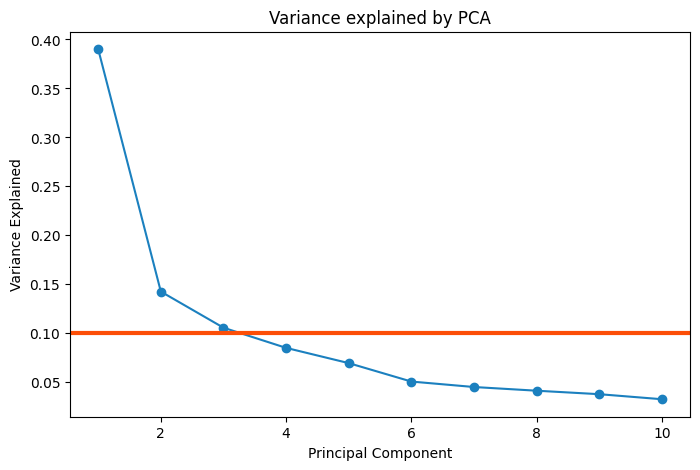

In [252]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [253]:
pca = PCA(n_components=2)

In [254]:
principal_components = pca.fit_transform(X_values)

In [255]:
pd.DataFrame(principal_components).head(8)

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557
5 -1.989787  0.020806
6 -1.598013 -1.305250
7  1.636833 -1.410185

In [256]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [257]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [258]:
final_df

principal component 1  principal component 2  target
0                 1.989103              -0.612637       1
1                -1.304821              -1.155632       3
2                 2.036264              -1.229210       1
3                -0.403509              -1.872577       2
4                -2.248810              -0.115557       3
..                     ...                    ...     ...
495              -0.504194               0.132121       2
496              -0.548141               0.224845       2
497              -1.005734              -3.193659       2
498               2.115411               0.242176       1
499              -1.520633               0.524282       3

[500 rows x 3 columns]

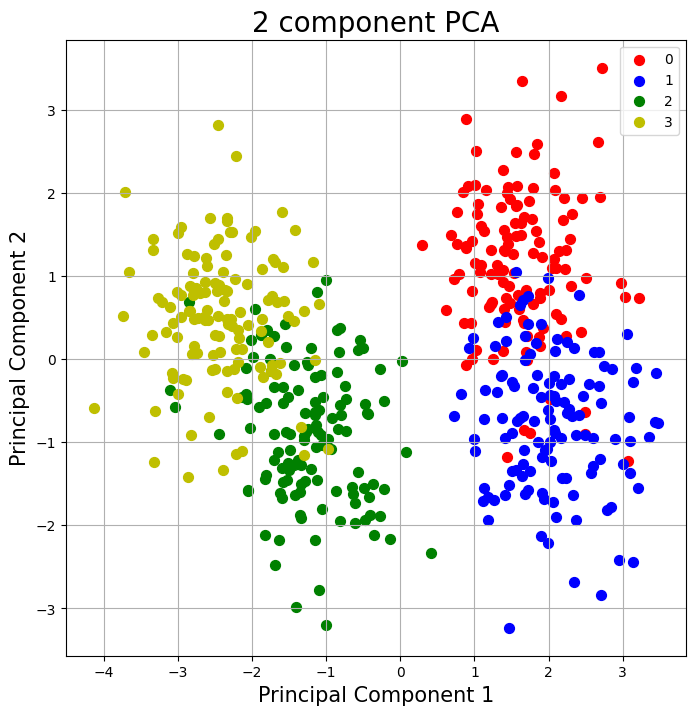

In [259]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

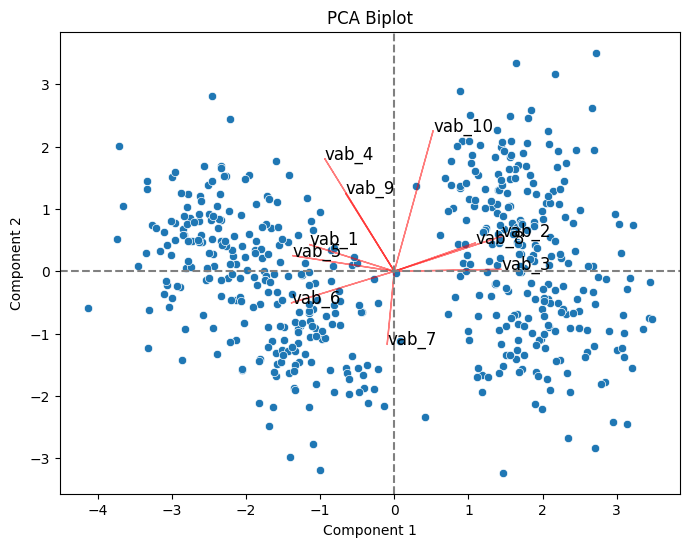

In [260]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

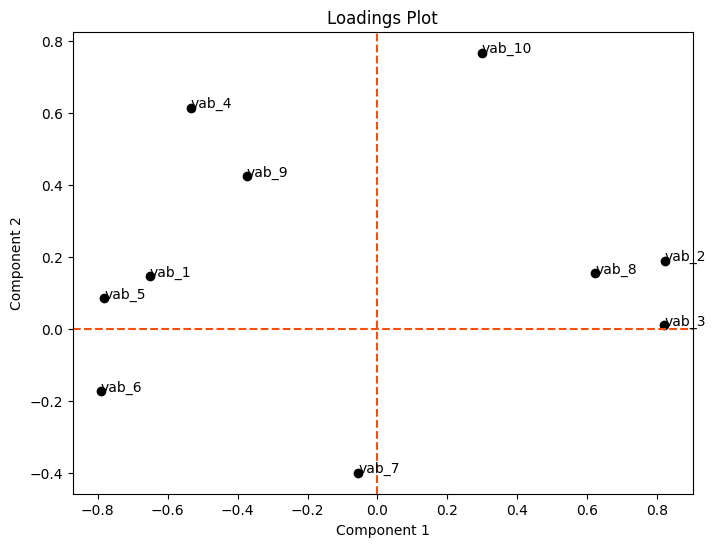

In [261]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [262]:
scores_pca = pca.transform(X_values)

In [263]:
pd.DataFrame(scores_pca).head()

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557

## t-SNE

In [264]:
from sklearn.manifold import TSNE

In [265]:
tsne = TSNE(n_components=2)

In [266]:
X_tsne = tsne.fit_transform(X_values)

In [267]:
tsne.kl_divergence_

0.9525728225708008

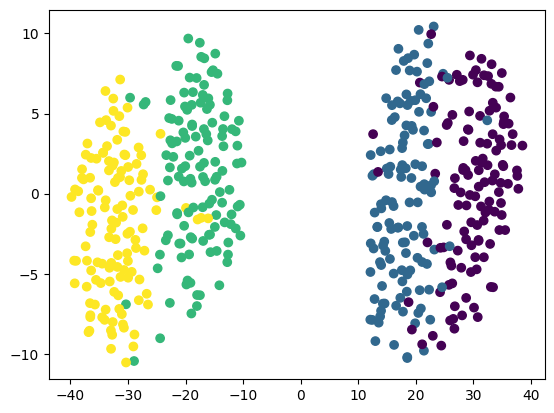

In [268]:
plt.scatter(x=X_tsne[:, 0],y=X_tsne[:, 1],c=y)
plt.show()

## clustering 

In [269]:
from sklearn.cluster import KMeans

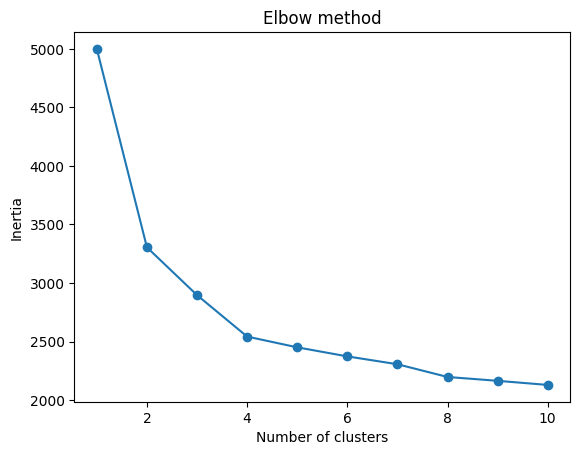

In [270]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [271]:
kmeans = KMeans(n_clusters=4)

In [272]:
kmeans.fit(X_values)

KMeans(n_clusters=4)

In [273]:
df_linear['k_means'] = kmeans.labels_

In [274]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        3  
2    -9.302836  4.211802 -4.587759  -5.983203       1        1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        3  
4    -5.886460 -4.564809  3.010796  -9.167377       3        2  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        0  
496 -11.446325  5.395608  1.606887  -0.122200       2        0  
497   1.309891  0.903259  2.360404 -21.488913       2        3  
498  -5.524547  0.760455 -0.050439   7.297902       1        1  
499  -0.810328  6.438151  7.111254  -5.241037       3        2  

[500 rows x 12 columns]

In [275]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.274
accuracy after: 0.602


In [276]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1  
496 -11.446325  5.395608  1.606887  -0.122200       2        1  
497   1.309891  0.903259  2.360404 -21.488913       2        2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3  

[500 rows x 12 columns]

In [277]:
print(np.unique(df_linear['target']))

[0 1 2 3]


In [278]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


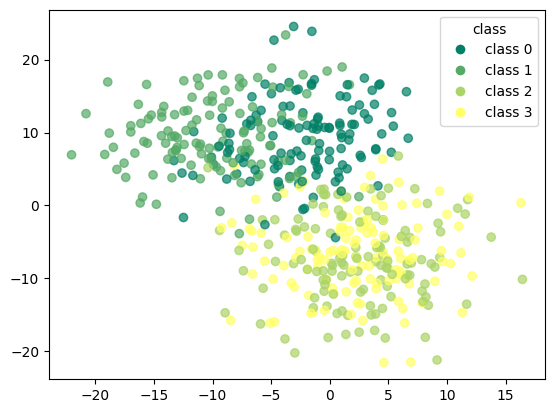

In [279]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

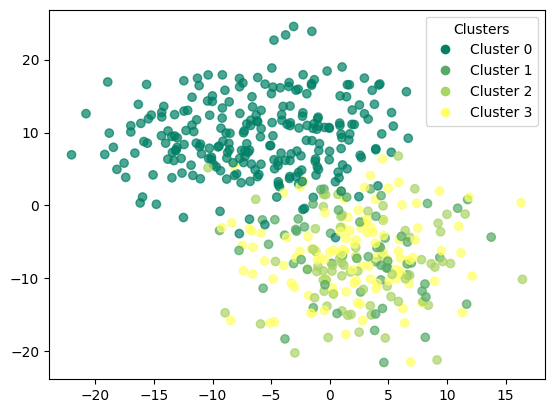

In [280]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [281]:
kmeans.cluster_centers_

array([[ 0.61252015, -0.81630453, -0.43401916, -0.45915431,  0.2521893 ,
         0.85636844, -0.87998042,  0.22665094,  0.42872406, -0.99438487],
       [-0.59907025,  0.83608028,  0.75557431, -0.36507269, -0.6865835 ,
        -0.77338999, -0.05302504,  0.53880595, -0.29006075,  0.42388959],
       [ 0.54648713, -0.78130877, -1.03412339,  1.15644282,  1.27567933,
         0.75785991,  0.18842369, -1.07360251,  0.47705619,  0.2047355 ],
       [ 0.67579761, -0.94592507, -0.57082613, -0.2389216 ,  0.0782854 ,
         0.72607407,  0.65115787, -0.31526785, -0.14797621, -0.97827607]])

In [282]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[125   0   0   0]
 [125   0   0   0]
 [  0  61  61   3]
 [  0   1   9 115]]


In [283]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.87      0.49      0.63       125
           3       0.97      0.92      0.95       125

    accuracy                           0.60       500
   macro avg       0.59      0.60      0.56       500
weighted avg       0.59      0.60      0.56       500



### clustering with pca

In [284]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

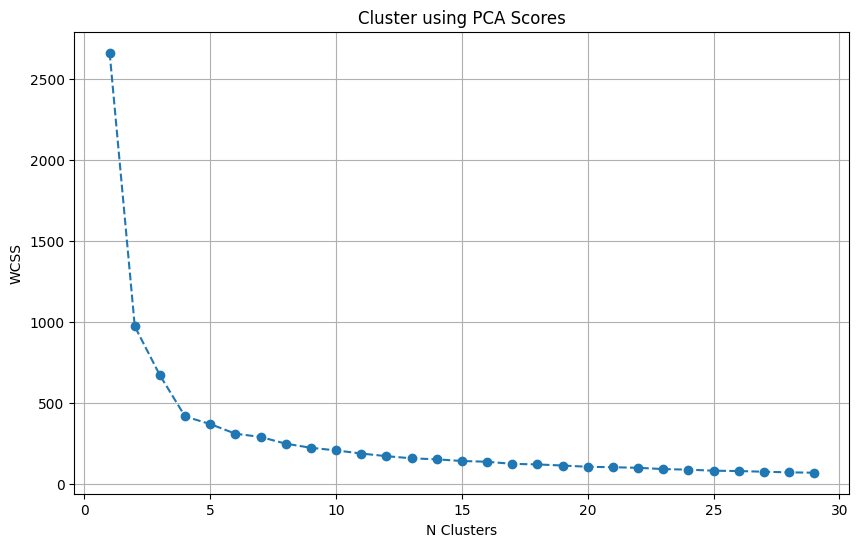

In [285]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [286]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [287]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [288]:
df_pca_kmeans = df_linear.copy()

In [289]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [290]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           0  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        1           2  
497   1.309891  0.903259  2.360404 -21.488913       2        2           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           0  

[500 rows x 13 columns]

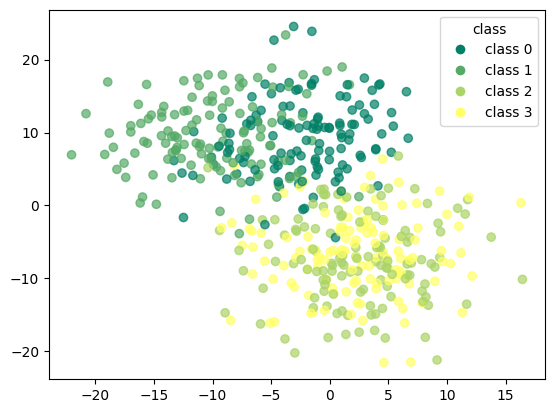

In [291]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

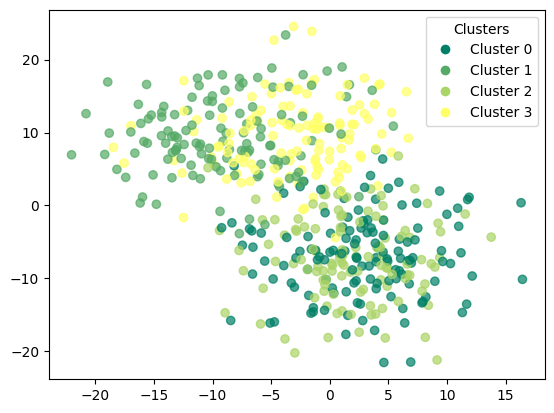

In [292]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [293]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.432
accuracy after: 0.884


In [294]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           3  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        1           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        1           2  
497   1.309891  0.903259  2.360404 -21.488913       2        2           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           3  

[500 rows x 13 columns]

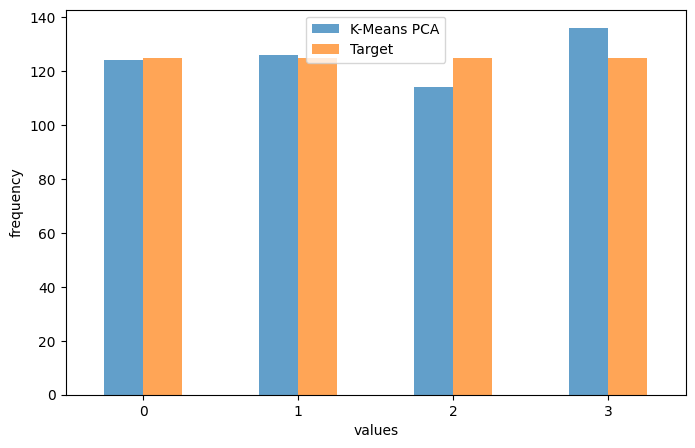

In [295]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [296]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[109  16   0   0]
 [ 15 110   0   0]
 [  0   0 106  19]
 [  0   0   8 117]]


In [297]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       125
           1       0.87      0.88      0.88       125
           2       0.93      0.85      0.89       125
           3       0.86      0.94      0.90       125

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



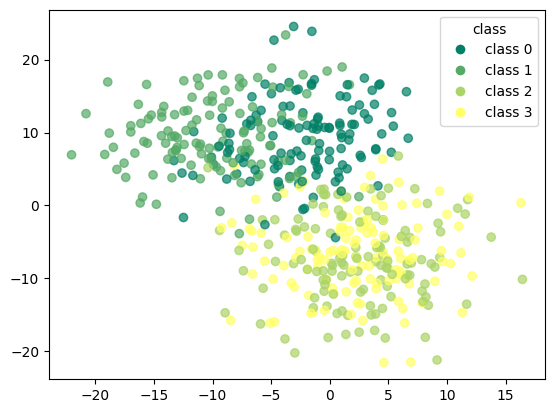

In [298]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

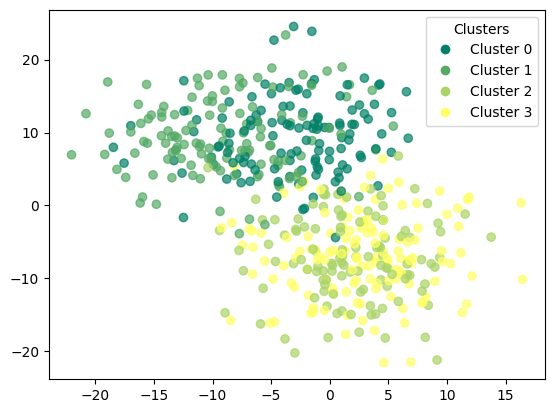

In [299]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

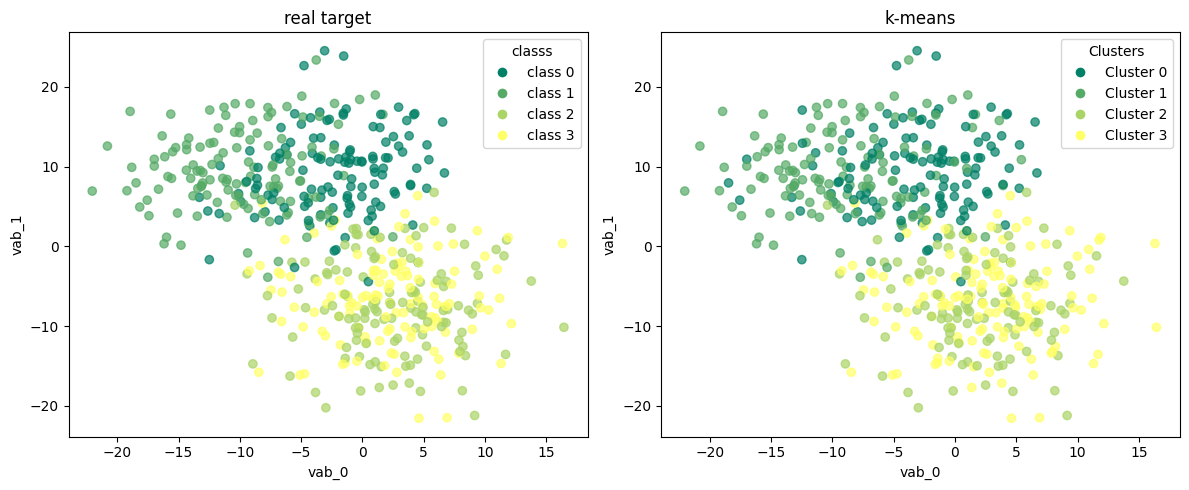

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

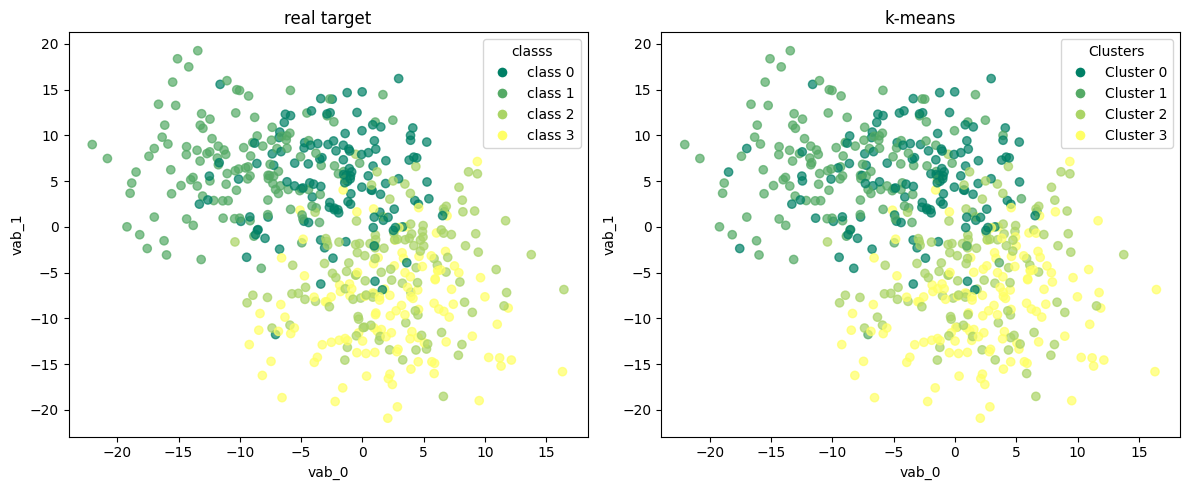

In [301]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

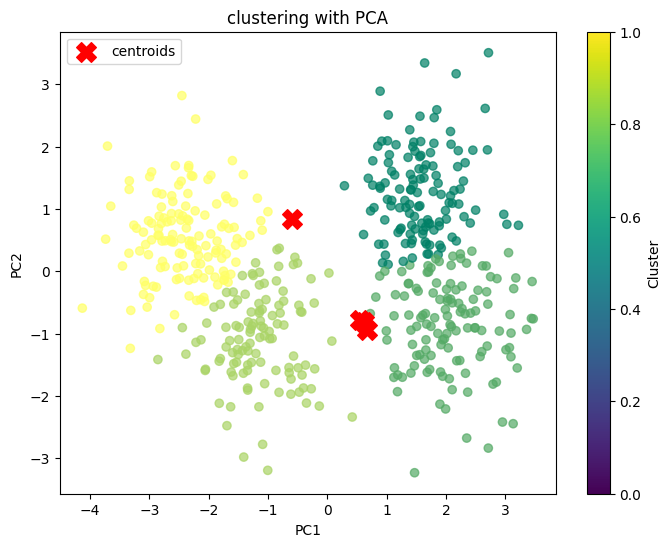

In [302]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

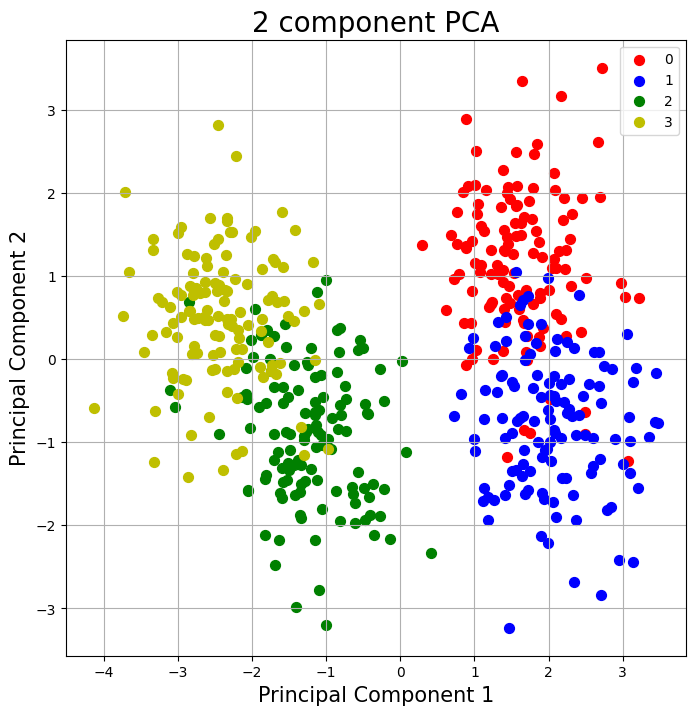

In [303]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

# non linear dataset - moons

In [304]:
X,y = make_moons(n_samples=500,noise=0.3, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.3,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [305]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749  0.310164 -0.122238  0.272389  0.037044 -0.037286   
1    1.185064  0.920387  0.682748 -0.255667  0.155431 -0.158760 -0.260786   
2    1.164022 -0.455526 -0.055244 -0.339054  0.081903 -0.622392 -0.027587   
3   -0.023656  1.086288 -0.151071 -0.045184 -0.229836 -0.338419  0.092968   
4    0.480503  1.509424  0.164905  0.540429 -0.390476 -0.555906 -0.037466   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.219954  0.413443 -0.297187 -0.102957  0.227695   
496  0.274530 -0.142661  0.554433  0.162005  0.318650 -0.097054  0.004286   
497  0.182398  0.029661 -0.024952  0.413201 -0.657594 -0.426670  0.204490   
498  1.260173 -0.589217  0.171284 -0.244321  0.171146  0.298324  0.366165   
499 -0.026649  1.583960 -0.456952 -0.159423 -0.057925  0.315096 -0.183300   

        vab_8     vab_9    vab_10  target  
0   -0.063415  0.223983  0.097673       1  
1   -0.003260  0.041206  0.875452       0  
2    0.004808  0.238380  0.292087       1  
3   -0.382076 -0.124388 -0.298552       0  
4    0.004709  0.065598 -0.133896       0  
..        ...       ...       ...     ...  
495  0.134424  0.459714  0.126161       0  
496  0.273283  0.483893  0.218771       1  
497  0.004233  0.181654  0.019322       1  
498  0.604066  0.073230  0.082173       1  
499  0.238902 -0.000487 -0.053150       0  

[500 rows x 11 columns]

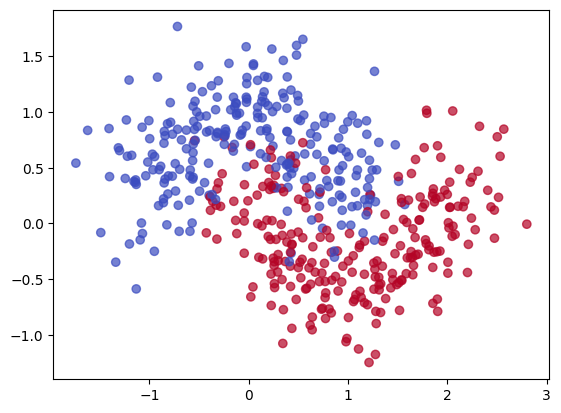

In [306]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [307]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749  0.310164 -0.122238  0.272389  0.037044 -0.037286   
1    1.185064  0.920387  0.682748 -0.255667  0.155431 -0.158760 -0.260786   
2    1.164022 -0.455526 -0.055244 -0.339054  0.081903 -0.622392 -0.027587   
3   -0.023656  1.086288 -0.151071 -0.045184 -0.229836 -0.338419  0.092968   
4    0.480503  1.509424  0.164905  0.540429 -0.390476 -0.555906 -0.037466   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.219954  0.413443 -0.297187 -0.102957  0.227695   
496  0.274530 -0.142661  0.554433  0.162005  0.318650 -0.097054  0.004286   
497  0.182398  0.029661 -0.024952  0.413201 -0.657594 -0.426670  0.204490   
498  1.260173 -0.589217  0.171284 -0.244321  0.171146  0.298324  0.366165   
499 -0.026649  1.583960 -0.456952 -0.159423 -0.057925  0.315096 -0.183300   

        vab_8     vab_9    vab_10  target  
0   -0.063415  0.223983  0.097673       1  
1   -0.003260  0.041206  0.875452       0  
2    0.004808  0.238380  0.292087       1  
3   -0.382076 -0.124388 -0.298552       0  
4    0.004709  0.065598 -0.133896       0  
..        ...       ...       ...     ...  
495  0.134424  0.459714  0.126161       0  
496  0.273283  0.483893  0.218771       1  
497  0.004233  0.181654  0.019322       1  
498  0.604066  0.073230  0.082173       1  
499  0.238902 -0.000487 -0.053150       0  

[500 rows x 11 columns]

### correlation matrix

In [308]:
df_moons.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.357584 -0.019980  0.050559 -0.047124  0.042757  0.016965   
vab_2  -0.357584  1.000000  0.011076 -0.022194 -0.004294  0.017838 -0.101874   
vab_3  -0.019980  0.011076  1.000000 -0.030093 -0.002277  0.052892  0.006116   
vab_4   0.050559 -0.022194 -0.030093  1.000000  0.013496  0.033328  0.069475   
vab_5  -0.047124 -0.004294 -0.002277  0.013496  1.000000 -0.035929 -0.032153   
vab_6   0.042757  0.017838  0.052892  0.033328 -0.035929  1.000000 -0.033703   
vab_7   0.016965 -0.101874  0.006116  0.069475 -0.032153 -0.033703  1.000000   
vab_8  -0.018195 -0.011945 -0.012248  0.036328  0.005963 -0.098584 -0.048151   
vab_9  -0.054506  0.028006 -0.034382 -0.008179 -0.065663 -0.090574 -0.131912   
vab_10 -0.065358  0.071077 -0.015300  0.014435 -0.012950 -0.103734  0.056888   

           vab_8     vab_9    vab_10  
vab_1  -0.018195 -0.054506 -0.065358  
vab_2  -0.011945  0.028006  0.071077  
vab_3  -0.012248 -0.034382 -0.015300  
vab_4   0.036328 -0.008179  0.014435  
vab_5   0.005963 -0.065663 -0.012950  
vab_6  -0.098584 -0.090574 -0.103734  
vab_7  -0.048151 -0.131912  0.056888  
vab_8   1.000000 -0.030532  0.084449  
vab_9  -0.030532  1.000000 -0.016351  
vab_10  0.084449 -0.016351  1.000000

<Axes: >

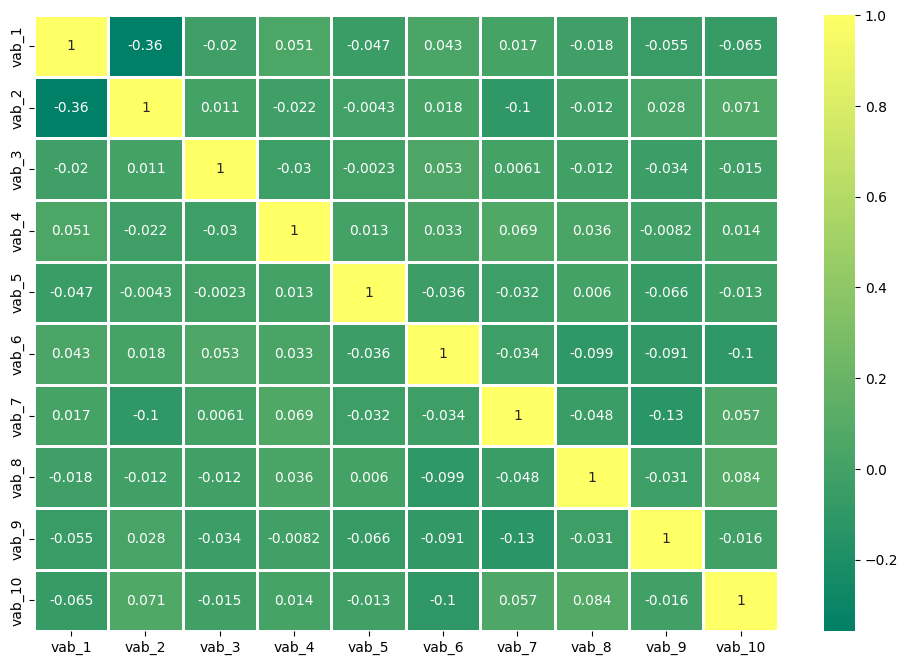

In [309]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [310]:
X_values = df_moons.iloc[:,:-1].values

In [311]:
y_values = df_moons.iloc[:,-1].values

In [312]:
from sklearn.preprocessing import StandardScaler

In [313]:
scaler = StandardScaler()

In [314]:
X_values = scaler.fit_transform(X_values)

In [315]:
np.mean(X_values),np.std(X_values)

(-6.394884621840901e-17, 0.9999999999999999)

In [316]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0    0.327883 -0.868825  1.000864 -0.415130  0.907842  0.204971 -0.136686   
1    0.709945  1.113499  2.201105 -0.838901  0.533572 -0.475338 -0.885645   
2    0.687237 -1.199639 -0.176263 -1.103735  0.298282 -2.086196 -0.104185   
3   -0.594500  1.392407 -0.484961 -0.170408 -0.699295 -1.099550  0.299801   
4   -0.050414  2.103769  0.532925  1.689495 -1.213350 -1.855193 -0.137290   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.264600  1.328634  0.710260  1.286188 -0.914820 -0.281455  0.751274   
496 -0.272699 -0.673661  1.787751  0.487624  1.055881 -0.260945  0.002623   
497 -0.372128 -0.383959 -0.078679  1.285418 -2.068134 -1.406174  0.673515   
498  0.791003 -1.424397  0.553474 -0.802864  0.583861  1.112772  1.215294   
499 -0.597731  2.229076 -1.470326 -0.533231 -0.149172  1.171044 -0.625987   

            7         8         9  
0   -0.239905  0.685974  0.341428  
1   -0.038681  0.111847  2.857319  
2   -0.011694  0.731196  0.970299  
3   -1.305851 -0.408303 -0.940248  
4   -0.012023  0.188466 -0.407633  
..        ...       ...       ...  
495  0.421882  1.426433  0.433577  
496  0.886379  1.502384  0.733144  
497 -0.013618  0.553013  0.087985  
498  1.992876  0.212438  0.291290  
499  0.771371 -0.019113 -0.146444  

[500 rows x 10 columns]

## pca application

In [317]:
from sklearn.decomposition import PCA

In [318]:
pca_general = PCA()

In [319]:
pca_general.fit(X_values)

PCA()

In [320]:
explained_variance = pca_general.explained_variance_ratio_

In [321]:
explained_variance

array([0.14290721, 0.12061485, 0.11467442, 0.10401342, 0.10146069,
       0.09922166, 0.09373164, 0.08662556, 0.07550509, 0.06124546])

In [322]:
eigenvalues = pca_general.explained_variance_

In [323]:
pd.DataFrame(eigenvalues)

0
0  1.431936
1  1.208566
2  1.149042
3  1.042219
4  1.016640
5  0.994205
6  0.939195
7  0.867992
8  0.756564
9  0.613682

In [324]:
eigenvectors = pca_general.components_

### scree plot

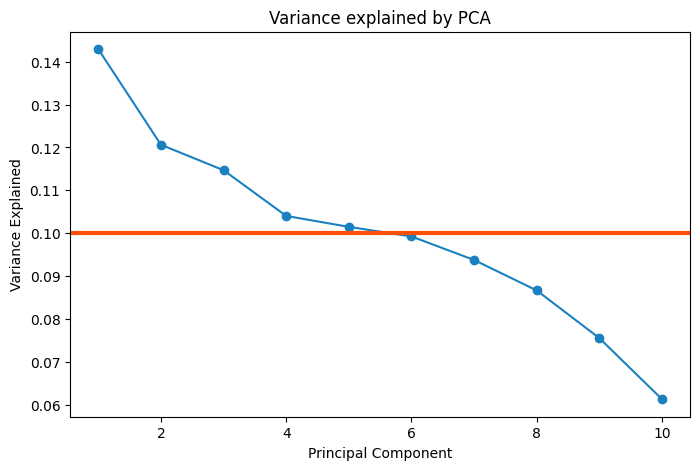

In [325]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [326]:
pca = PCA(n_components=2)

In [327]:
principal_components = pca.fit_transform(X_values)

In [328]:
pd.DataFrame(principal_components).head(8)

0         1
0  0.447872  0.253756
1 -1.314165 -0.696995
2  0.340723 -1.577056
3 -0.945275  0.576165
4 -1.315013 -0.558715
5  0.829730 -2.400281
6  0.230998  0.435420
7 -1.963538 -0.945974

In [329]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [330]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis = 1)

In [331]:
final_df

principal component 1  principal component 2  target
0                 0.447872               0.253756       1
1                -1.314165              -0.696995       0
2                 0.340723              -1.577056       1
3                -0.945275               0.576165       0
4                -1.315013              -0.558715       0
..                     ...                    ...     ...
495              -1.062271              -0.515772       0
496              -0.319187              -0.670952       1
497               0.125802              -1.133623       1
498               1.431835              -0.821341       1
499              -1.857154               0.661425       0

[500 rows x 3 columns]

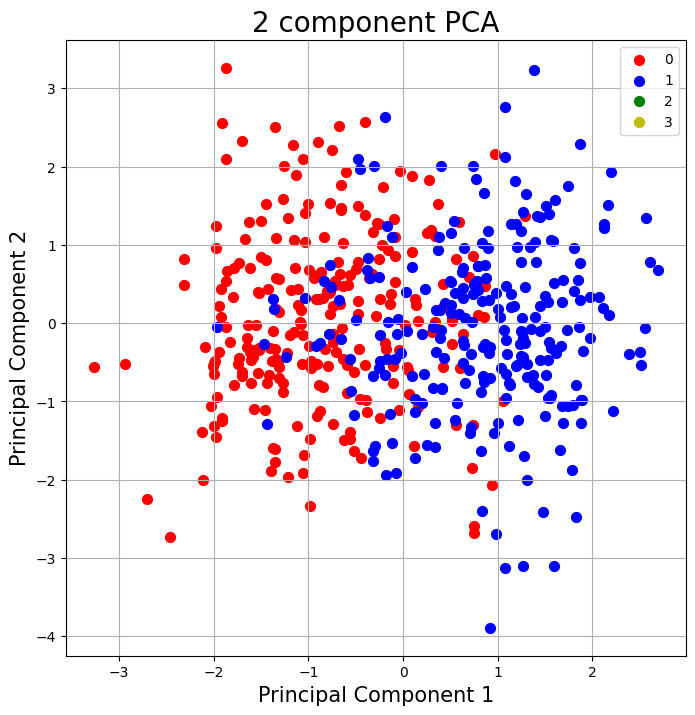

In [332]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

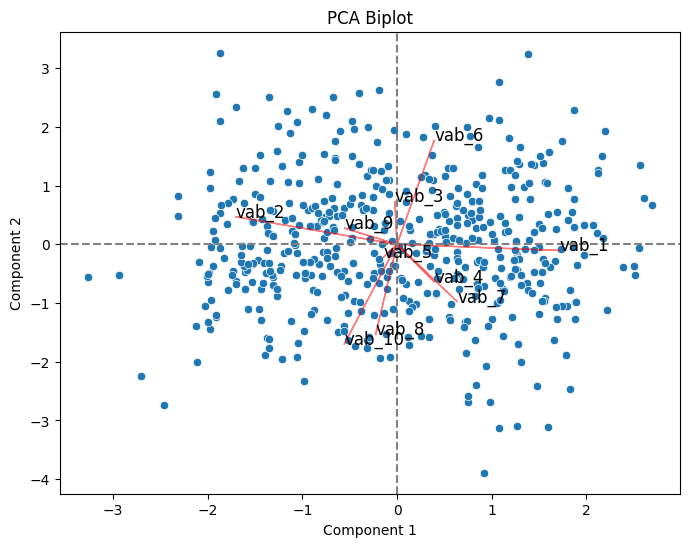

In [333]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

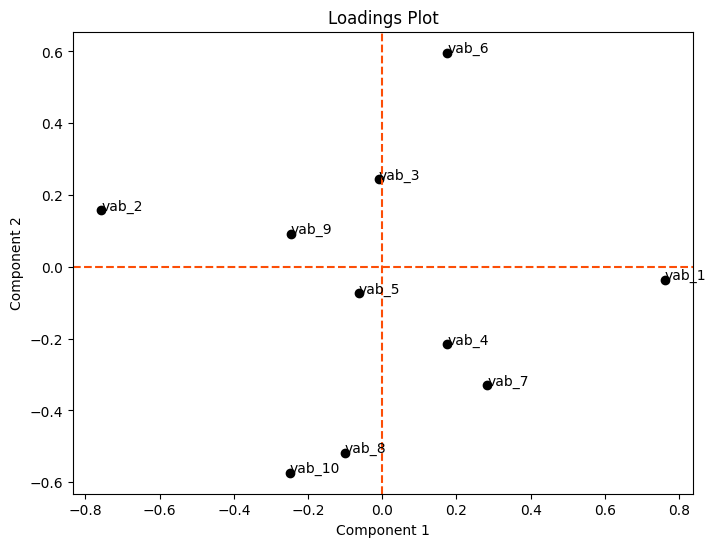

In [334]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [335]:
scores_pca = pca.transform(X_values)

In [336]:
pd.DataFrame(scores_pca).head()

0         1
0  0.447872  0.253756
1 -1.314165 -0.696995
2  0.340723 -1.577056
3 -0.945275  0.576165
4 -1.315013 -0.558715

In [337]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_values)

In [338]:
tsne.kl_divergence_

1.5562684535980225

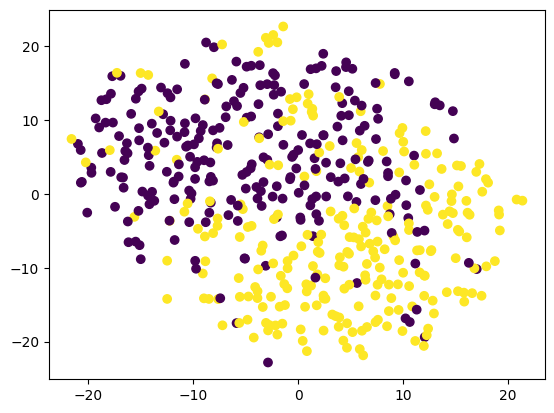

In [339]:
plt.scatter(x=X_tsne[:, 0],y=X_tsne[:, 1],c=y)

## clustering 

In [340]:
from sklearn.cluster import KMeans

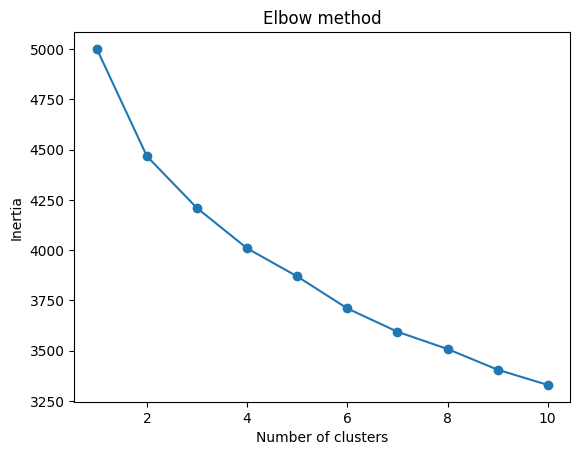

In [341]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [342]:
kmeans = KMeans(n_clusters=2)

In [343]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [344]:
df_moons['k_means'] = kmeans.labels_

In [345]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749  0.310164 -0.122238  0.272389  0.037044 -0.037286   
1    1.185064  0.920387  0.682748 -0.255667  0.155431 -0.158760 -0.260786   
2    1.164022 -0.455526 -0.055244 -0.339054  0.081903 -0.622392 -0.027587   
3   -0.023656  1.086288 -0.151071 -0.045184 -0.229836 -0.338419  0.092968   
4    0.480503  1.509424  0.164905  0.540429 -0.390476 -0.555906 -0.037466   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.219954  0.413443 -0.297187 -0.102957  0.227695   
496  0.274530 -0.142661  0.554433  0.162005  0.318650 -0.097054  0.004286   
497  0.182398  0.029661 -0.024952  0.413201 -0.657594 -0.426670  0.204490   
498  1.260173 -0.589217  0.171284 -0.244321  0.171146  0.298324  0.366165   
499 -0.026649  1.583960 -0.456952 -0.159423 -0.057925  0.315096 -0.183300   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.063415  0.223983  0.097673       1        0  
1   -0.003260  0.041206  0.875452       0        1  
2    0.004808  0.238380  0.292087       1        0  
3   -0.382076 -0.124388 -0.298552       0        1  
4    0.004709  0.065598 -0.133896       0        1  
..        ...       ...       ...     ...      ...  
495  0.134424  0.459714  0.126161       0        1  
496  0.273283  0.483893  0.218771       1        1  
497  0.004233  0.181654  0.019322       1        0  
498  0.604066  0.073230  0.082173       1        0  
499  0.238902 -0.000487 -0.053150       0        1  

[500 rows x 12 columns]

In [346]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.174
accuracy after: 0.826


In [347]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749  0.310164 -0.122238  0.272389  0.037044 -0.037286   
1    1.185064  0.920387  0.682748 -0.255667  0.155431 -0.158760 -0.260786   
2    1.164022 -0.455526 -0.055244 -0.339054  0.081903 -0.622392 -0.027587   
3   -0.023656  1.086288 -0.151071 -0.045184 -0.229836 -0.338419  0.092968   
4    0.480503  1.509424  0.164905  0.540429 -0.390476 -0.555906 -0.037466   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.219954  0.413443 -0.297187 -0.102957  0.227695   
496  0.274530 -0.142661  0.554433  0.162005  0.318650 -0.097054  0.004286   
497  0.182398  0.029661 -0.024952  0.413201 -0.657594 -0.426670  0.204490   
498  1.260173 -0.589217  0.171284 -0.244321  0.171146  0.298324  0.366165   
499 -0.026649  1.583960 -0.456952 -0.159423 -0.057925  0.315096 -0.183300   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.063415  0.223983  0.097673       1        1  
1   -0.003260  0.041206  0.875452       0        0  
2    0.004808  0.238380  0.292087       1        1  
3   -0.382076 -0.124388 -0.298552       0        0  
4    0.004709  0.065598 -0.133896       0        0  
..        ...       ...       ...     ...      ...  
495  0.134424  0.459714  0.126161       0        0  
496  0.273283  0.483893  0.218771       1        0  
497  0.004233  0.181654  0.019322       1        1  
498  0.604066  0.073230  0.082173       1        1  
499  0.238902 -0.000487 -0.053150       0        0  

[500 rows x 12 columns]

In [348]:
print(np.unique(df_moons['target']))

[0 1]


In [349]:
print(np.unique(kmeans.labels_))

[0 1]


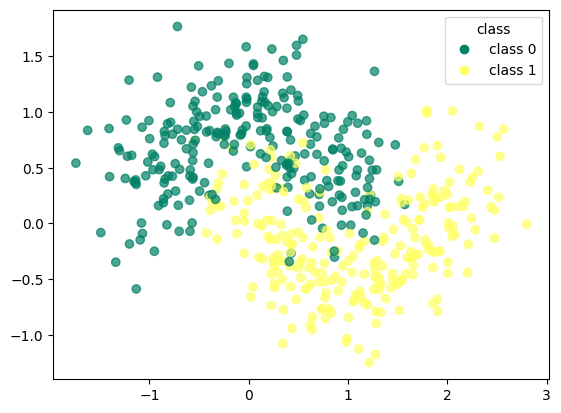

In [350]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

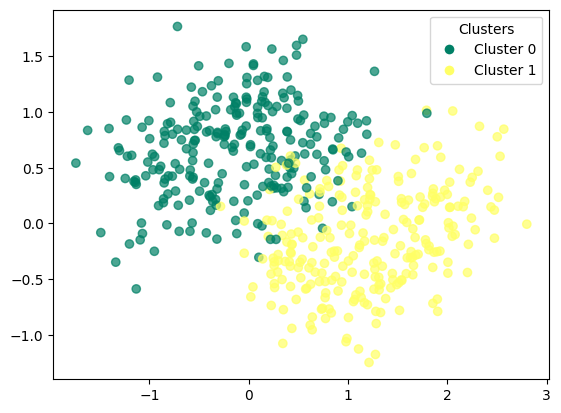

In [351]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [352]:
kmeans.cluster_centers_

array([[ 0.71824149, -0.68175784, -0.03466998,  0.08016173, -0.04782693,
         0.06537892,  0.14522138, -0.02434656, -0.11429753, -0.17518274],
       [-0.7240105 ,  0.68723381,  0.03494845, -0.0808056 ,  0.04821109,
        -0.06590405, -0.14638782,  0.02454211,  0.11521558,  0.17658983]])

In [353]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[206  44]
 [ 43 207]]


In [354]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       250
           1       0.82      0.83      0.83       250

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



### clustering with pca

In [355]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

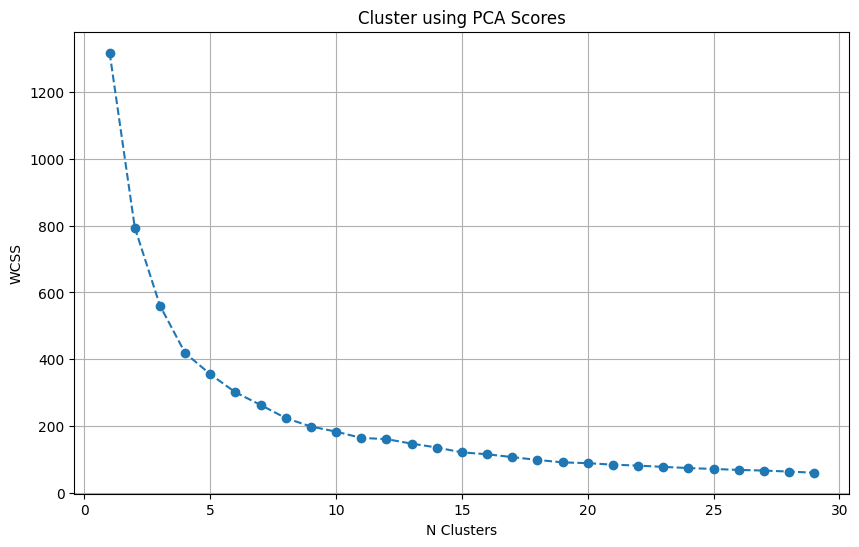

In [356]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [357]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [358]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [359]:
df_pca_kmeans = df_moons.copy()

In [360]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [361]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749  0.310164 -0.122238  0.272389  0.037044 -0.037286   
1    1.185064  0.920387  0.682748 -0.255667  0.155431 -0.158760 -0.260786   
2    1.164022 -0.455526 -0.055244 -0.339054  0.081903 -0.622392 -0.027587   
3   -0.023656  1.086288 -0.151071 -0.045184 -0.229836 -0.338419  0.092968   
4    0.480503  1.509424  0.164905  0.540429 -0.390476 -0.555906 -0.037466   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.219954  0.413443 -0.297187 -0.102957  0.227695   
496  0.274530 -0.142661  0.554433  0.162005  0.318650 -0.097054  0.004286   
497  0.182398  0.029661 -0.024952  0.413201 -0.657594 -0.426670  0.204490   
498  1.260173 -0.589217  0.171284 -0.244321  0.171146  0.298324  0.366165   
499 -0.026649  1.583960 -0.456952 -0.159423 -0.057925  0.315096 -0.183300   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.063415  0.223983  0.097673       1        1           0  
1   -0.003260  0.041206  0.875452       0        0           1  
2    0.004808  0.238380  0.292087       1        1           0  
3   -0.382076 -0.124388 -0.298552       0        0           1  
4    0.004709  0.065598 -0.133896       0        0           1  
..        ...       ...       ...     ...      ...         ...  
495  0.134424  0.459714  0.126161       0        0           1  
496  0.273283  0.483893  0.218771       1        0           1  
497  0.004233  0.181654  0.019322       1        1           0  
498  0.604066  0.073230  0.082173       1        1           0  
499  0.238902 -0.000487 -0.053150       0        0           1  

[500 rows x 13 columns]

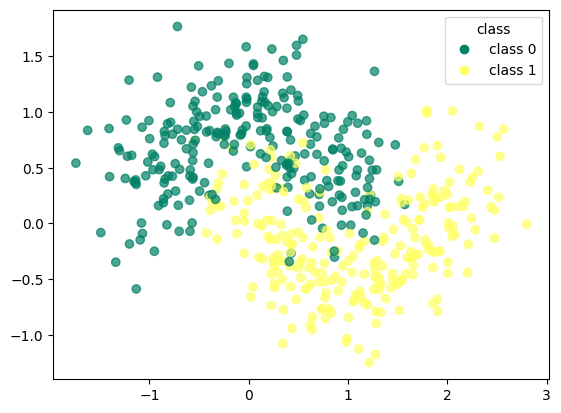

In [362]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

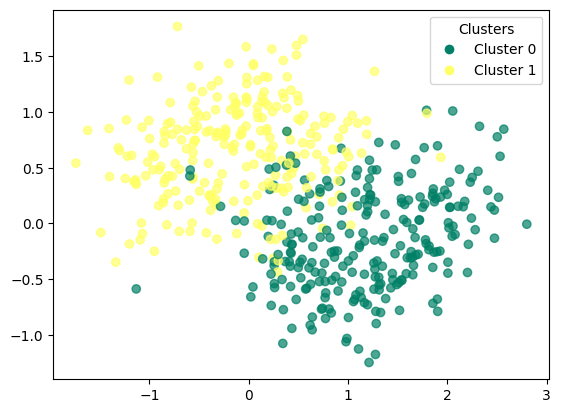

In [363]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [364]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.176
accuracy after: 0.824


In [365]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749  0.310164 -0.122238  0.272389  0.037044 -0.037286   
1    1.185064  0.920387  0.682748 -0.255667  0.155431 -0.158760 -0.260786   
2    1.164022 -0.455526 -0.055244 -0.339054  0.081903 -0.622392 -0.027587   
3   -0.023656  1.086288 -0.151071 -0.045184 -0.229836 -0.338419  0.092968   
4    0.480503  1.509424  0.164905  0.540429 -0.390476 -0.555906 -0.037466   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.219954  0.413443 -0.297187 -0.102957  0.227695   
496  0.274530 -0.142661  0.554433  0.162005  0.318650 -0.097054  0.004286   
497  0.182398  0.029661 -0.024952  0.413201 -0.657594 -0.426670  0.204490   
498  1.260173 -0.589217  0.171284 -0.244321  0.171146  0.298324  0.366165   
499 -0.026649  1.583960 -0.456952 -0.159423 -0.057925  0.315096 -0.183300   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.063415  0.223983  0.097673       1        1           1  
1   -0.003260  0.041206  0.875452       0        0           0  
2    0.004808  0.238380  0.292087       1        1           1  
3   -0.382076 -0.124388 -0.298552       0        0           0  
4    0.004709  0.065598 -0.133896       0        0           0  
..        ...       ...       ...     ...      ...         ...  
495  0.134424  0.459714  0.126161       0        0           0  
496  0.273283  0.483893  0.218771       1        0           0  
497  0.004233  0.181654  0.019322       1        1           1  
498  0.604066  0.073230  0.082173       1        1           1  
499  0.238902 -0.000487 -0.053150       0        0           0  

[500 rows x 13 columns]

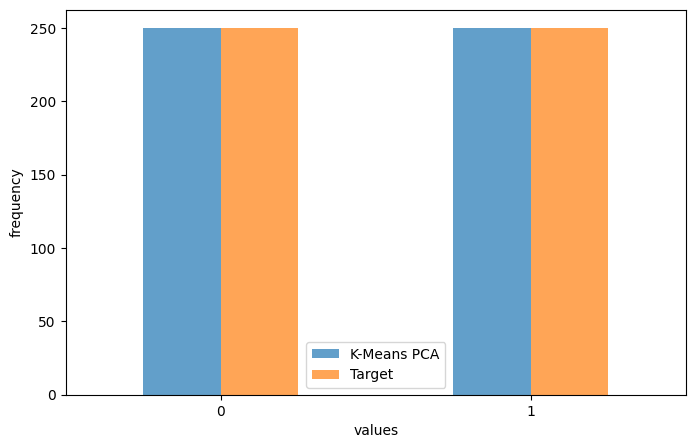

In [366]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [367]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[206  44]
 [ 44 206]]


In [368]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       250
           1       0.82      0.82      0.82       250

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



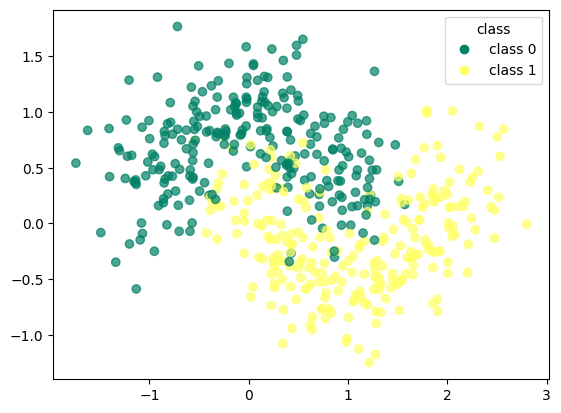

In [369]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

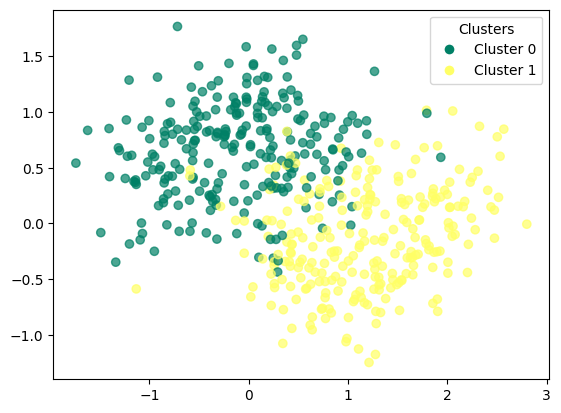

In [370]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

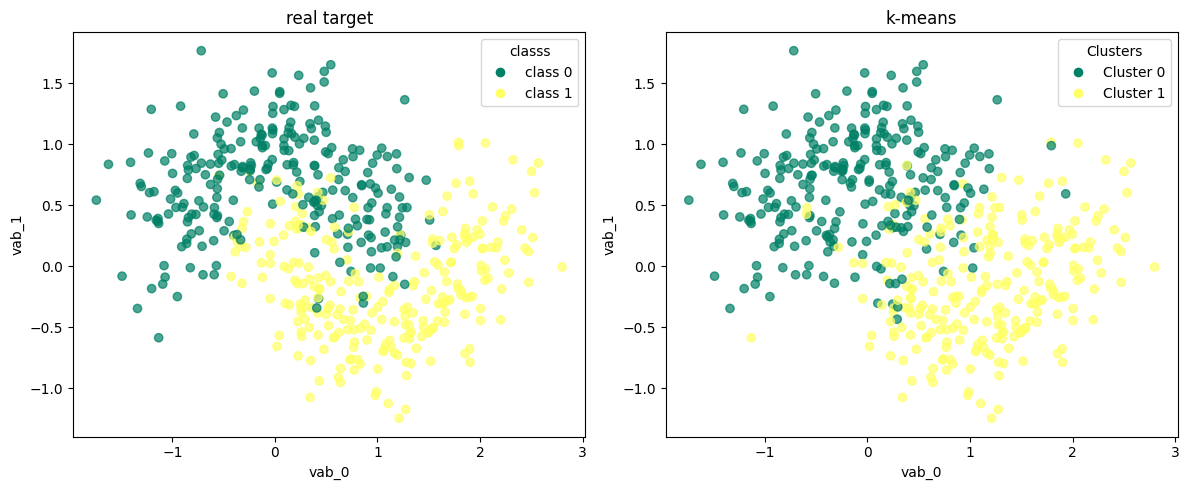

In [371]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

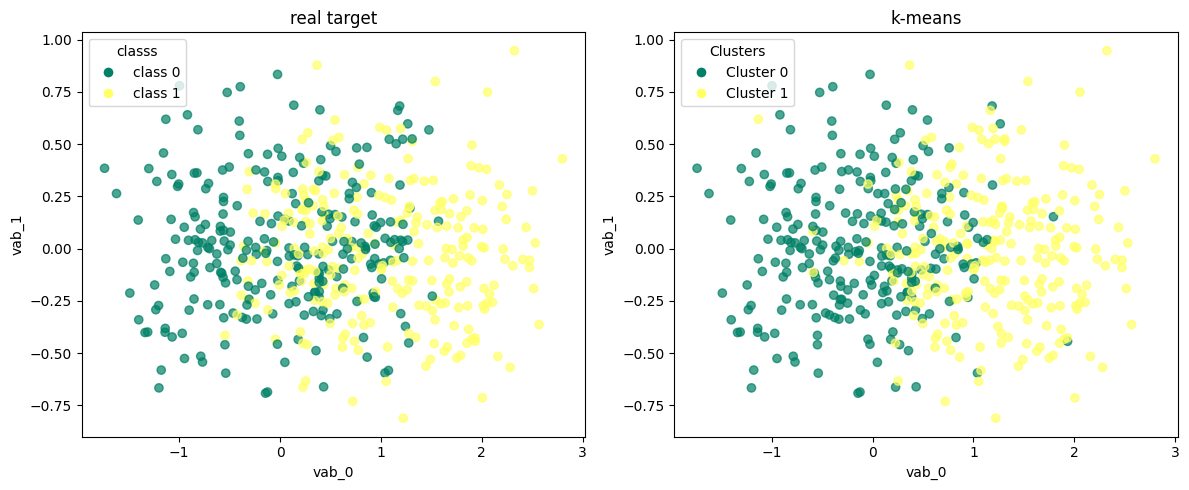

In [372]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

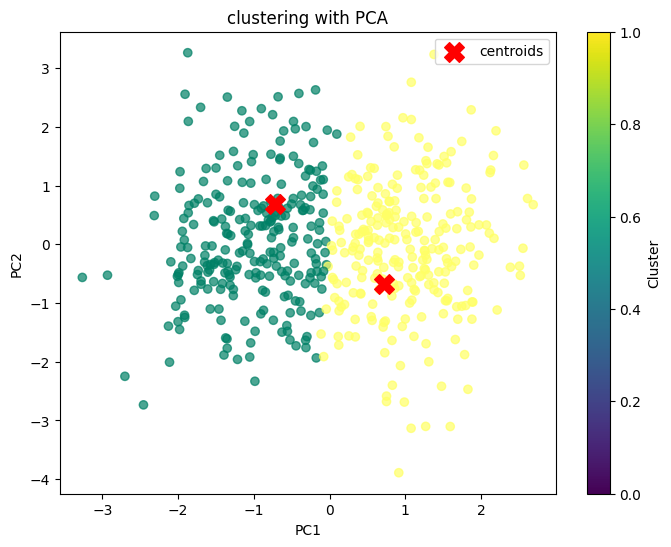

In [373]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

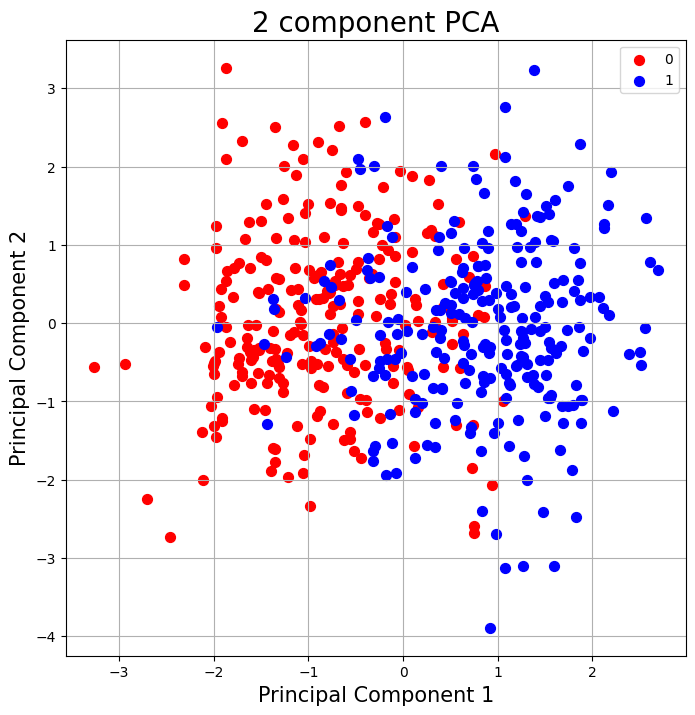

In [374]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

# non linear dataset - circles

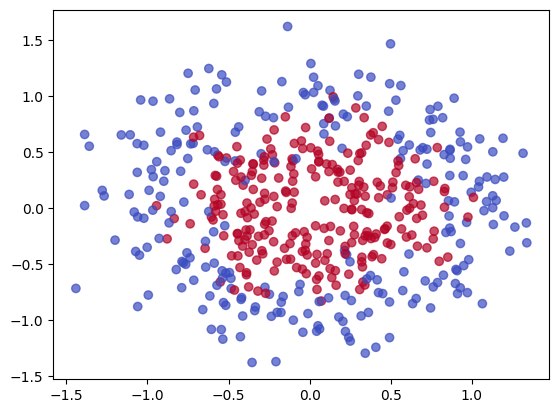

In [375]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [376]:
df3

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    -0.469004   0.323509  -0.212299   0.198819  -0.231368  -0.153524   
1     0.125867   1.048157   0.214176   0.195914   0.010061   0.445850   
2    -0.386288   0.042201  -0.379901  -0.355008   0.064999  -0.531518   
3    -0.494481  -0.578267   0.415081   0.186421   0.110095   0.516195   
4    -0.714102   0.865415  -0.142395  -0.498632  -0.231927  -0.549093   
..         ...        ...        ...        ...        ...        ...   
495  -0.854312   0.509894   0.902205  -0.116940  -0.185349   0.306206   
496   0.600061  -0.021119   0.174646  -0.135558   0.497001   0.032924   
497  -0.715531   0.630037   0.760332  -0.131487   0.243657   0.396370   
498  -0.318829  -0.743461   0.420541   0.614364   0.508533   0.062779   
499  -1.042015   0.962384   0.277690   0.430043   0.189805  -0.418094   

     Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0     0.571783   0.053247  -0.421649    0.351015    0.098838   -1.260802   
1    -0.336197   0.168250  -0.783480    0.203545    0.976530   -0.497428   
2     0.210624   0.423420   0.267174   -0.884208    0.497584    0.468684   
3     0.961757  -0.476520   0.539063   -0.043109   -0.064837   -0.768265   
4    -0.224454  -0.203055   0.048377   -0.807375   -0.722759    0.180957   
..         ...        ...        ...         ...         ...         ...   
495   0.275406  -0.100973  -0.625013    0.152851    0.275718    0.362911   
496  -0.232462  -0.090327  -0.872985   -0.091121    0.344218    0.169892   
497   1.171429   0.072383  -0.522094    0.423964    0.932864   -0.161274   
498  -0.349237  -0.040640   0.229300    0.454111    0.166973   -0.189954   
499  -0.090703   0.473910  -0.691509   -1.046589    0.754041    0.255708   

     Target  
0         1  
1         0  
2         1  
3         0  
4         0  
..      ...  
495       0  
496       1  
497       1  
498       1  
499       0  

[500 rows x 13 columns]